# Hierarchical Clustering
This notebook provides the code for the Hierarchical Clustering chapters in Part 3 of the Exploratory Data Analysis course.  Please review in conjunction with the course notes.

### Loading, Cleaning and Standardising the Data
Import the libraries we need.

In [1]:
# Import standard libraries
import pandas as pd
import numpy as np

# Import the hierarchical clustering algorithm
from sklearn.cluster import AgglomerativeClustering

# Import functions created for this course
from functions import *

Load the data set:

In [2]:
# Load the data from the csv file into a Pandas Dataframe
original_data = pd.read_csv('world_university_rankings_2016.csv', index_col='university_name')
original_data.head()

,world_rank,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international%,female%,male%
university_name,,,,,,,,,,,,,
California Institute of Technology,1,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,27.0,33.0,67.0
University of Oxford,2,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34.0,46.0,54.0
Stanford University,3,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22.0,42.0,58.0
University of Cambridge,4,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,34.0,46.0,54.0
Massachusetts Institute of Technology,5,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,33.0,37.0,63.0


Filter our data down to just the remaining columns of interest:

In [3]:
X = original_data[['teaching', 'international',
       'research', 'citations', 'income', 'num_students',
       'student_staff_ratio', 'international%', 'female%',
       'male%']]
X.head()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international%,female%,male%
university_name,,,,,,,,,,
California Institute of Technology,95.6,64.0,97.6,99.8,97.8,2243.0,6.9,27.0,33.0,67.0
University of Oxford,86.5,94.4,98.9,98.8,73.1,19919.0,11.6,34.0,46.0,54.0
Stanford University,92.5,76.3,96.2,99.9,63.3,15596.0,7.8,22.0,42.0,58.0
University of Cambridge,88.2,91.5,96.7,97.0,55.0,18812.0,11.8,34.0,46.0,54.0
Massachusetts Institute of Technology,89.4,84.0,88.6,99.7,95.4,11074.0,9.0,33.0,37.0,63.0


Replace nulls with the mean value of the variable:

In [4]:
X = X.fillna(X.mean()) 

Apply the standard scaler:

In [5]:
# Import the sklearn function
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 4.27456366,  0.65465542,  3.55897378, ...,  1.34850955,
        -1.44235777,  1.44235777],
       [ 3.66692605,  1.93865583,  3.62557194, ...,  2.008736  ,
        -0.30856882,  0.30856882],
       [ 4.06756624,  1.17416874,  3.48725268, ...,  0.87691922,
        -0.65742695,  0.65742695],
       ...,
       [-0.50640919, -1.36848995, -0.91847191, ..., -0.91512401,
         0.        ,  0.        ],
       [-0.76682531, -1.0643846 , -0.62134164, ..., -0.44353369,
        -1.87843044,  1.87843044],
       [-1.02724143, -1.30091099, -0.50351413, ..., -0.82080595,
        -0.57021242,  0.57021242]])

### Performing a Hierarchical Clustering
Perform the hierarchical clustering:

In [6]:
# Create a hierarchical clustering model
hiercluster = AgglomerativeClustering(affinity='euclidean', linkage='ward', compute_full_tree=True)  

Ask the algorithm to find 3 clusters from the tree:

In [7]:
# Fit the data to the model and determine which clusters each data point belongs to:
hiercluster.set_params(n_clusters=3)
clusters = hiercluster.fit_predict(X_scaled) 
np.bincount(clusters) # count of data points in each cluster

array([555, 146,  99], dtype=int64)

Read off 5 clusters from the tree:

In [8]:
# Read off 5 clusters:
hiercluster.set_params(n_clusters=5)
clusters = hiercluster.fit_predict(X_scaled) 
np.bincount(clusters)

array([336,  50,  99, 146, 169], dtype=int64)

Put the cluster number on as a new column on the original data:

In [9]:
# Add cluster number to the original data
X_scaled_clustered = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_clustered['cluster'] = clusters

X_scaled_clustered.head()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international%,female%,male%,cluster
university_name,,,,,,,,,,,
California Institute of Technology,4.274564,0.654655,3.558974,1.794039,2.536181,-0.976050,-0.980509,1.348510,-1.442358,1.442358,2
University of Oxford,3.666926,1.938656,3.625572,1.757041,1.306195,-0.188914,-0.603279,2.008736,-0.308569,0.308569,2
Stanford University,4.067566,1.174169,3.487253,1.797739,0.818185,-0.381423,-0.908273,0.876919,-0.657427,0.657427,2
University of Cambridge,3.780441,1.816169,3.512867,1.690445,0.404870,-0.238210,-0.587226,2.008736,-0.308569,0.308569,2
Massachusetts Institute of Technology,3.860569,1.499393,3.097910,1.790340,2.416668,-0.582793,-0.811959,1.914418,-1.093500,1.093500,2


## Analysing the Results

Find the size of the clusters:

In [10]:
# Find the size of the clusters
X_scaled_clustered["cluster"].value_counts()

0    336
4    169
3    146
2     99
1     50
Name: cluster, dtype: int64

Show the dendrogram for the smallest cluster:

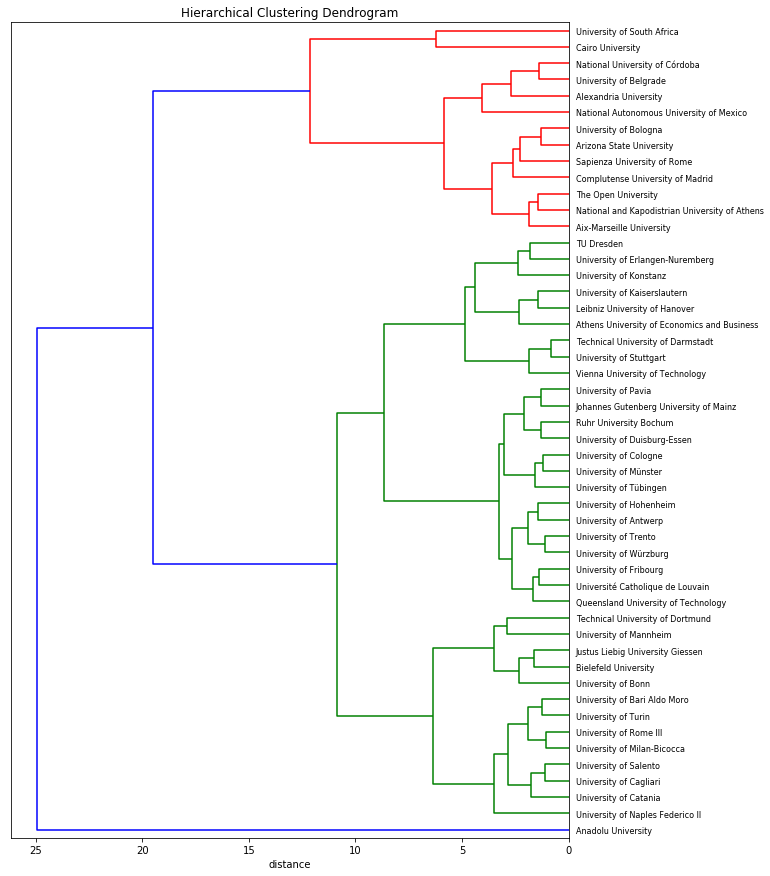

In [11]:
# Show a dendrogram, just for the first smallest cluster
from scipy.cluster.hierarchy import linkage, fcluster 
sample = X_scaled_clustered[X_scaled_clustered.cluster==1]
Z = linkage(sample, 'ward') 
names = sample.index 
plot_dendrogram(Z, names, figsize=(10,15))

Perform the PCA, asking for 2 principal components:

In [12]:
from sklearn.decomposition import PCA

# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(X_scaled)

Confirm we have the new vector space and clusters:

In [13]:
X_reduceddf = pd.DataFrame(X_reduced, index=X.index, columns=['PC1','PC2'])
X_reduceddf['cluster'] = clusters
X_reduceddf.head()

,PC1,PC2,cluster
university_name,,,
California Institute of Technology,5.555064,-3.811757,2
University of Oxford,5.977205,-1.462953,2
Stanford University,5.231170,-2.141250,2
University of Cambridge,5.735713,-1.242813,2
Massachusetts Institute of Technology,5.721362,-2.896713,2


Display the data points:

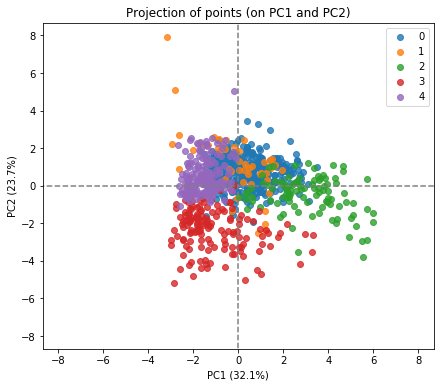

In [14]:
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)


### Interpreting the Meaning of the Clusters

### Parallel Coordinates Plot
Produce a parallel coordinates plot of all data points:

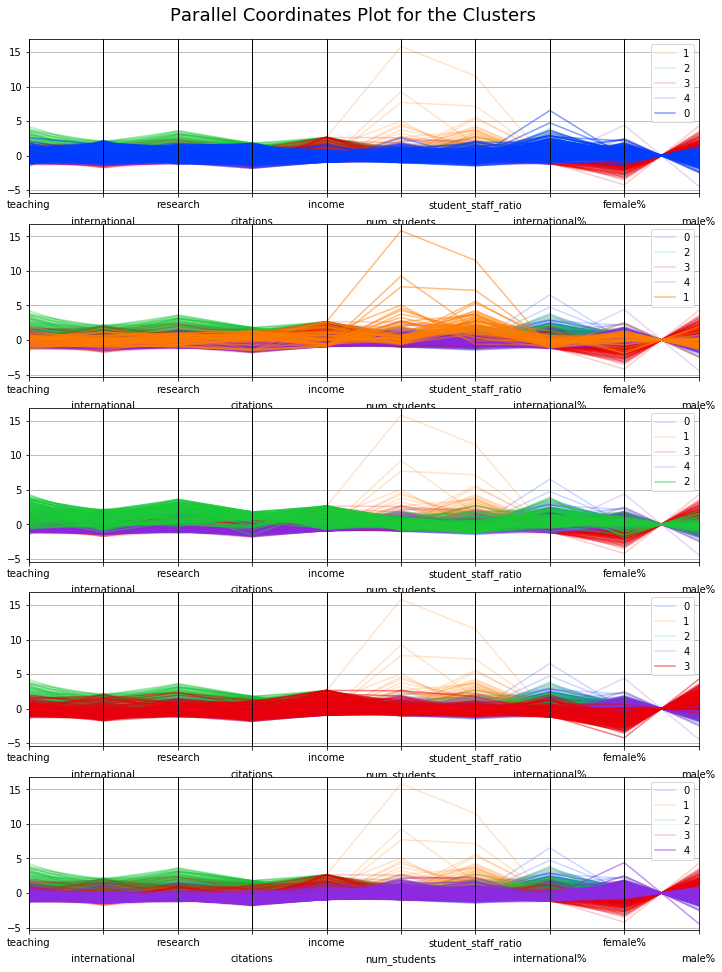

In [15]:
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X_clustered["cluster"] = clusters

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_clustered, 5)

Compute centroids in each cluster:

In [16]:
means =  X_clustered.groupby(by="cluster").mean()

Plot them:

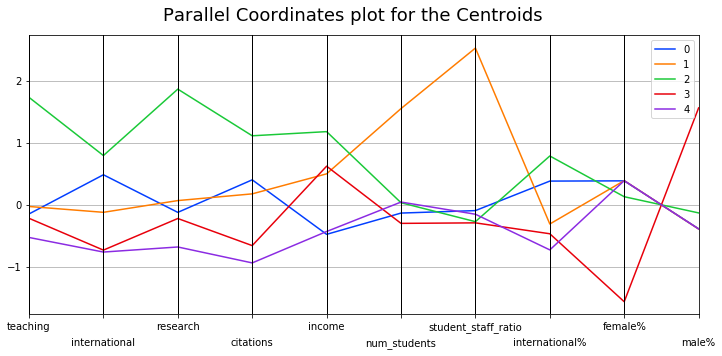

In [17]:
display_parallel_coordinates_centroids(means.reset_index(), 5)

Produce boxplots for each variable within each cluster:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C34373A3C8>,
      dtype=object)

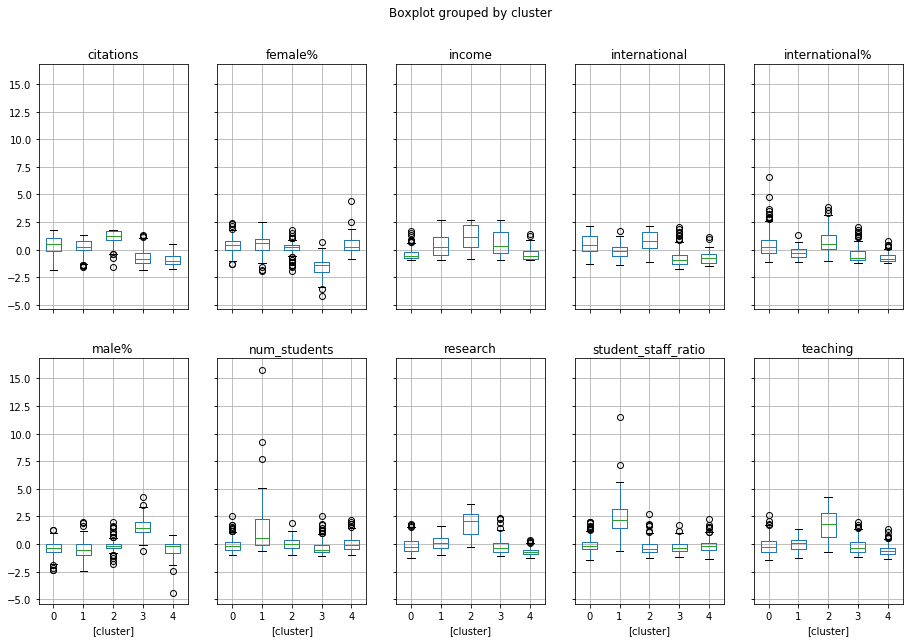

In [18]:
X_clustered.boxplot(by="cluster", figsize=(15,10), layout=(2,5))